In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [45]:
df = pd.read_csv("economic_index.csv")

In [46]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [47]:
#drop unneccesary columns 
df.drop(columns=["Unnamed: 0","year","month"], axis=1,inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [48]:
#check null values 
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

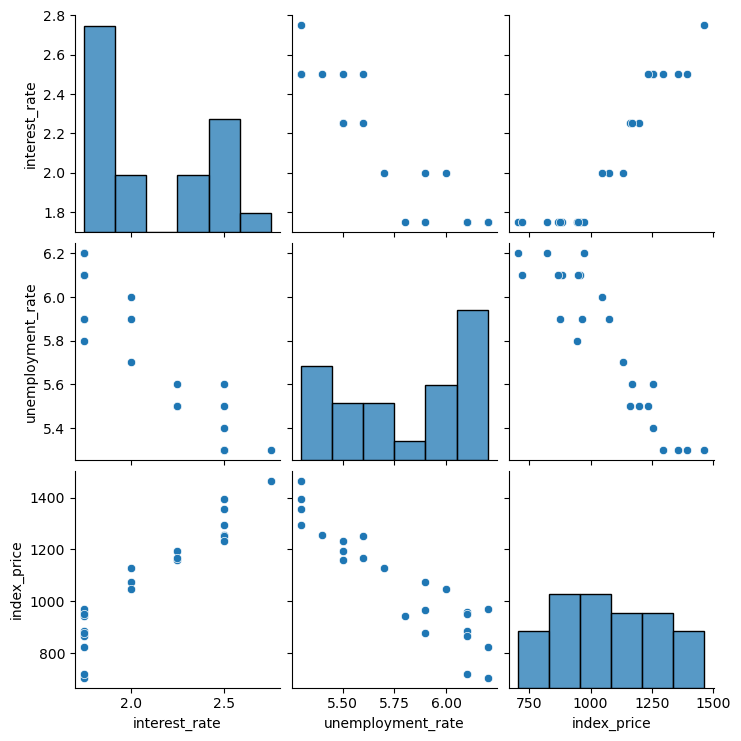

In [49]:
import seaborn as sns
sns.pairplot(df)

In [50]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

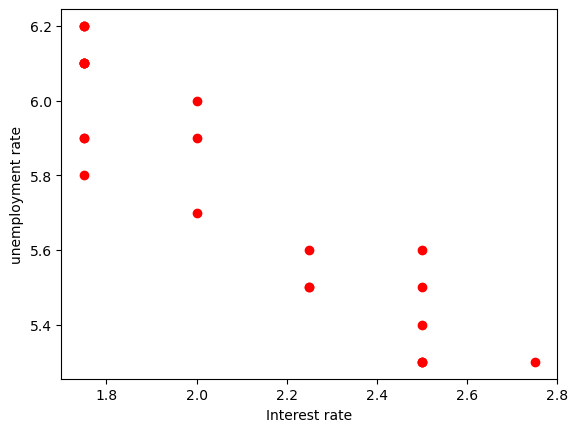

In [51]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [52]:
##independent nd dependent variable 
X = df[['interest_rate','unemployment_rate']].values
Y = df[['index_price']].values

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0, shuffle=True
)


In [54]:
class MultipleLinearRegression:
    
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.losses = []

    # Mean Squared Error
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    # R2 Score
    def r2_score(self, y_true, y_pred):
        y_true = np.array(y_true).ravel()
        y_pred = np.array(y_pred).ravel()

        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)

    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y).ravel()

        n_samples, n_features = X.shape

        # initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - Y))
            db = (1 / n_samples) * np.sum(y_pred - Y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.losses.append(self.mse(Y, y_pred))

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias
        
    

In [55]:
class StandardScalerScratch:
    def fit(self, X):
        X = np.array(X)
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        return self

    def transform(self, X):
        X = np.array(X)
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

scaler = StandardScalerScratch()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [56]:
model = MultipleLinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("MSE:", model.mse(Y_test, y_pred))
print("R2 Score:", model.r2_score(Y_test, y_pred))


MSE: 28486.151033880433
R2 Score: 0.6673712218652945


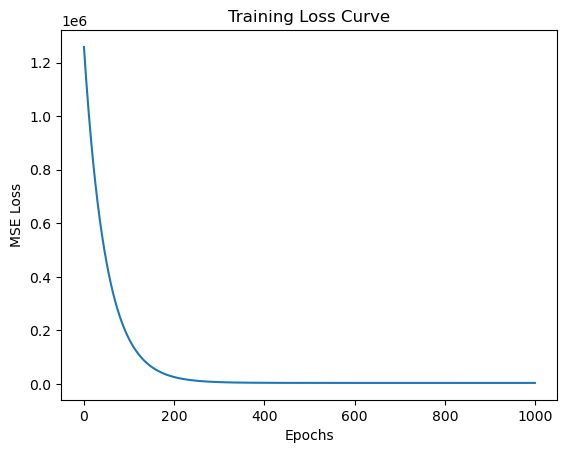

In [57]:
import matplotlib.pyplot as plt

plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()
